In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Képfeldolgozás

## Műveletek állóképeken

A feladatok elvégzését igazolandó jegyzőkönyvében tisztán naplózza munkáját, beleértve eljárásainak elvét, implementációit valamint eredményeit. 
Ne felejtse el jegyzőkönyvéhez csatolni, azaz a jegyzőkönyvet tartalmazó munkakönyvtárba másolni a feladatok kidolgozására elkészített bemeneti képállományokat is.


## 1. Egykép műveletek

Egy tetszőlegesen kiválasztott kamera segítségével készítsen színes képet, a terem egy olyan nézetéről, ahol egyszerre jól látszanak az ablakokat sötétítő vászoncsíkok és a munkaállomások polcai is.

Végezze el a következő feladatokat a képen!

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


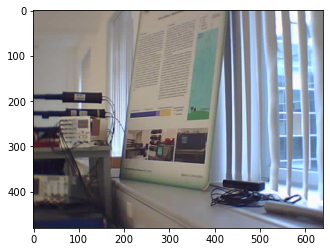

In [3]:
kep = imread("feladat1.png")
imshow(kep)

In [4]:
kep[:,:,0]

array([[0.54509807, 0.54509807, 0.54509807, ..., 0.50980395, 0.50980395,
        0.50980395],
       [0.54509807, 0.54509807, 0.54509807, ..., 0.50980395, 0.50980395,
        0.50980395],
       [0.54509807, 0.54509807, 0.54509807, ..., 0.50980395, 0.50980395,
        0.50980395],
       ...,
       [0.10980392, 0.10980392, 0.10980392, ..., 0.30588236, 0.3019608 ,
        0.3019608 ],
       [0.10980392, 0.10980392, 0.10980392, ..., 0.33333334, 0.32941177,
        0.3254902 ],
       [0.10980392, 0.10980392, 0.10980392, ..., 0.36078432, 0.35686275,
        0.3529412 ]], dtype=float32)

### 1.1. Szürke kép - 1 pont

Alakítsa szürke árnyalatúra, a három színcsatorna lineáris kombinációjaként. (milyen súlyokat választott és miért?)

In [5]:
fekete_feher = kep[:,:,0]*0.2 + kep[:,:,1]*0.2 + kep[:,:,2]*0.4

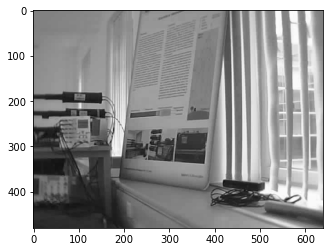

In [6]:
imshow(fekete_feher,cmap = "gray")

### 1.2. Hisztogram - 1 pont

Szerkessze meg, ábrázolja és elemezze a kép intenzitás hisztogramját,

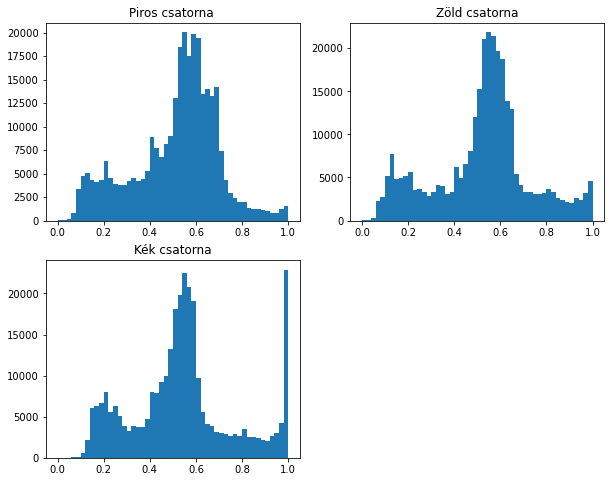

In [7]:
figsize(10,8)
names =  ["Piros csatorna ", "Zöld csatorna", "Kék csatorna" ]
for i in range(3):
    flatten = kep[:,:,i].flatten()
    subplot(2,2,i+1)
    title(names[i])
    plt.hist(flatten,bins = 50)

### 1.3. Élkeresés - 2 pont

Adjon meg rendre olyan kernelmátrixokat, amelyek segítségével a képen található vizszintes élek, függőleges élek vagy átlós élek emelődnek ki.

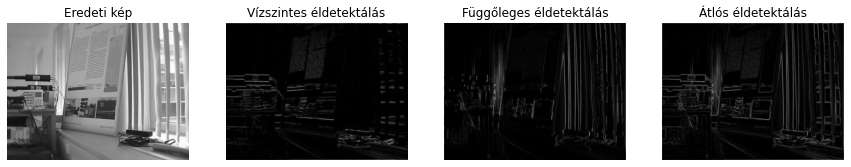

In [8]:
from skimage import io, color
from scipy.ndimage import convolve

# Kép beolvasása
image_path = 'feladat1.png'
original_image = io.imread(image_path)


gray_image = color.rgb2gray(original_image)


horizontal_edge_matrix = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
vertical_edge_matrix = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
diagonal_edge_matrix = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])


vertical_edges = np.abs(convolve(gray_image, horizontal_edge_matrix, mode='constant', cval=0.0))
horizontal_edges = np.abs(convolve(gray_image, vertical_edge_matrix, mode='constant', cval=0.0))
diagonal_edges = np.abs(convolve(gray_image, diagonal_edge_matrix, mode='constant', cval=0.0))


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Eredeti kép')

axes[1].imshow(horizontal_edges, cmap='gray')
axes[1].set_title('Vízszintes éldetektálás')

axes[2].imshow(vertical_edges, cmap='gray')
axes[2].set_title('Függőleges éldetektálás')

axes[3].imshow(diagonal_edges, cmap='gray')
axes[3].set_title('Átlós éldetektálás')

for ax in axes:
    ax.axis('off')

plt.show()


### 1.4. Méretskálázás - 3 pont

Kicsinyítse a képet az eredeti méret $\frac{7}{13}$-dára. Implementáljon saját eljárást. Kész könyvtárak alkalmazása nem teljesértékű megoldás.

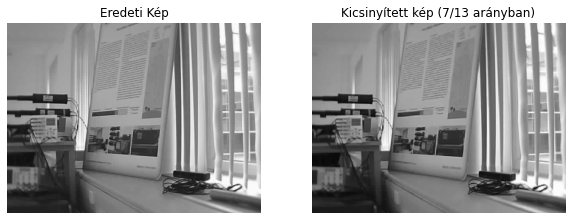

In [9]:
from skimage import io, color


image_path = 'feladat1.png'
original_image = io.imread(image_path)
gray_image = color.rgb2gray(original_image)


scale_factor = 7 / 13

new_height = int(gray_image.shape[0] * scale_factor)
new_width = int(gray_image.shape[1] * scale_factor)

small_image = np.zeros((new_height, new_width)) #incializálunk egy új arrayt a kicsinyített méretnek megfelelően


for i in range(new_height):
    for j in range(new_width):
        x_start = int(j / scale_factor)
        y_start = int(i / scale_factor)
        x_end = min(x_start + 1, gray_image.shape[1] - 1)
        y_end = min(y_start + 1, gray_image.shape[0] - 1)

        small_image[i, j] = np.mean(gray_image[y_start:y_end+1, x_start:x_end+1])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Eredeti Kép')

axes[1].imshow(small_image, cmap='gray')
axes[1].set_title('Kicsinyített kép (7/13 arányban)')

for ax in axes:
    ax.axis('off')

plt.show()


In [10]:
gray_image.shape

(480, 640)

In [11]:
small_image.shape

(258, 344)

## 2. Többkép műveletek - 4 pont

Készítsen időben több felvételt a kiválasztott kamera segítségével úgy, hogy a látómezőben egy tárgy rendre kicsit elmozdul. Az elmozdolás legyen pici, azaz fedjen át a tárgy a korábbi képen levő helyével. *Megjegyzés:* ehhez a feladathoz az állványról leszerelheti a kamerát a kényelmesebb munkavégzés végett.

* A különbségi kép segítségével próbálja megbecsülni, hol történt a látómezőben a változás.
* Számszerűsítse a képpárok között a hasonlóságot. Az a természetes elvárás, hogy egy objektum nemvisszatérő mozgása során időben minél távolabbi képkockákat vetünk egybe, a korreláció egyre kisebb. Próbálja empirikusan megmutatni, hogy ez a sejtés helyes-e.

In [12]:
kepek = array(zeros((13,kep.shape[0],kep.shape[1],kep.shape[2])))
for i in range(13):
    kepek[i,:,:,:] = imread(str(i+1)+".png")
diff = array(zeros((12,kep.shape[0],kep.shape[1],kep.shape[2])))
for i in range(12):
      diff[i,:,:,:] = kepek[i+1,:,:,:] - kepek[i,:,:,:]

Nagyítsa a kicsinyített képet vissza az eredeti méretére. Mutassa meg, hogyan romlott a kép a két transzformáció elvégzése után!

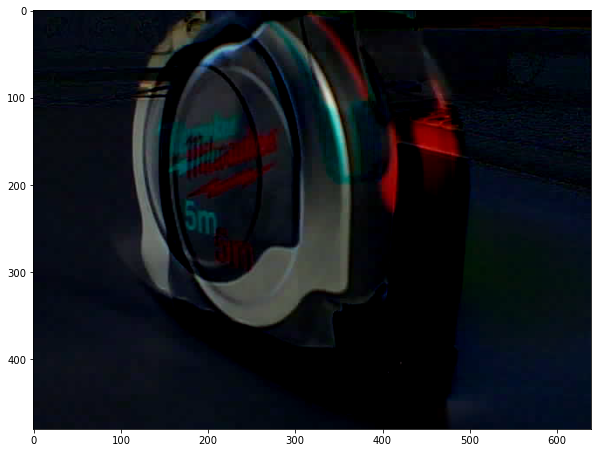

In [13]:
imshow(diff[11,:,:,:])

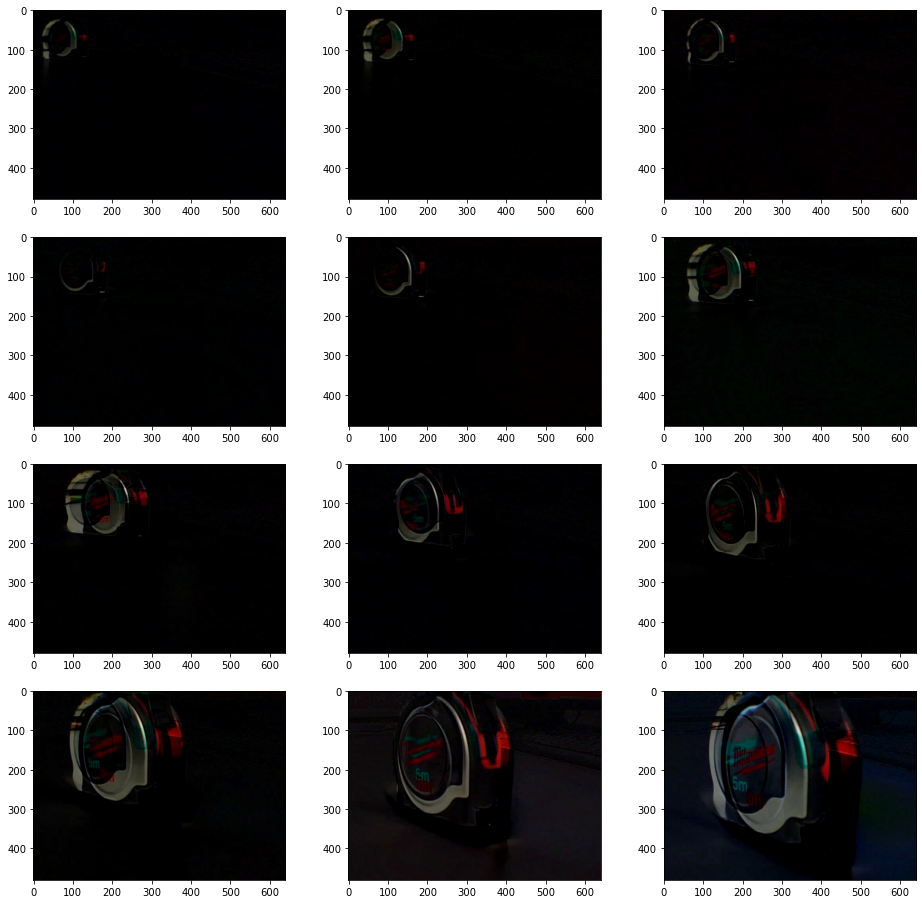

In [14]:
figsize(16,16)
for i in range(12):
    subplot(4,3,i+1)
    imshow(diff[i,:,:,:])

In [15]:
kepek.shape

(13, 480, 640, 3)

In [16]:
diff2 = []
for index in range(13):
    diff2.append(np.sum(kepek[0,:,:].flatten()-kepek[index,:,:].flatten()))

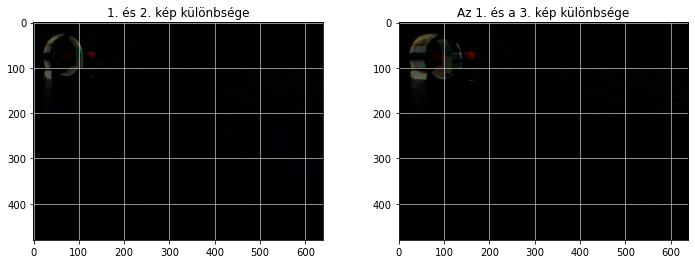

In [17]:
figsize(12,4)
subplot(1,2,1)
imshow(diff[0,:,:,:])
title("1. és 2. kép különbsége")
grid()
subplot(1,2,2)
imshow(kepek[2,:,:,:]-kepek[0,:,:,:]) # az első négy elmozdítás még nagyjából ugyanakkora volt
title("Az 1. és a 3. kép különbsége")

grid()

# 3. Kamerakalibráció

## 3.1. A perspektíva vizsgálata - 4 pont

Válasson egy állandó méretű tárgyat, például a mérőhelyen talál egy fekete téglatestet (szünetmentes tápegység akkumulátora).
<img src="supplementary/akksi.png" alt="perspektíva vizsgálata">
A kísérlet során az eddig használt kamerával készítsen a tárgyról felvételeket úgy, hogy a kamerától különböző távolságokra helyezi le azt. 
Törekedjen arra, hogy a tárgy legnagyobb felületét lássa a kamera, azaz essen a kamera optikai tengelye és a tárgy közepén átmenő normális. 
A különböző távolságban rögzített képkockákon keresse meg és mérje meg a tárgy ugyanazon jellemzőjét. Ábrázolja a tárgy látszó méretét a távolság függvényében!
Milyen összefüggést vár? Illessze is meg modelljét!

In [18]:
def square(t,a,b,c):
    return a*t**2+b*t+c

In [19]:
táv = [54,49,44,38,33,25] #cm
szélesség = [258,293,326,388,450,634] #pixel

In [20]:
from scipy.optimize import curve_fit

popt,perr = curve_fit(square,táv,szélesség)

Text(0, 0.5, 'Akkumulátor szélessége [px]')

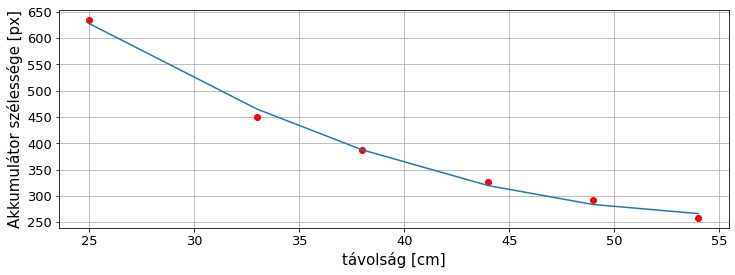

In [21]:
plot(táv,szélesség, "ro")
plot(táv,square(array(táv),*popt))
grid(True)
xticks(size = 13)
yticks(size = 13)
xlabel("távolság [cm]", size = 15)
ylabel("Akkumulátor szélessége [px]", size = 15)

## 3.2. A kamera leképezési mátrixának meghatározása - 8 pont

A munkaterületen Salgo elemektől koordinátarendszert építettünk (bal oldali kép).

<table>
    <tr>
        <td>
<img src="supplementary/salgo.png" alt="referencia rendszer">
        </td>
        <td>
<img src="supplementary/kétkamera.png" alt="felvétel készítése">
        </td>
    </tr>
</table>

Ezen a referenciarendszeren markerek találhatóak, melyekről készítsen felvételt két kamerával, amiket állványra rögzít (jobb oldali kép).
Mérje meg mérőszalag segítségével a markerek térbeli helyét és foglalja táblázatba.
Határozza meg ugyanezeknek a markereknek a helyét a mintaképen és vezesse azok képkkordinátáit is fel a táblázat megfelelő helyére.
A jegyzetben tárgyalt egyenletek segítségével határozza meg a kamerák leképezési mátrixát.
Ellenőrzésképpen ábrázolja a 3D térben feszülő koordinátatengelyeket a képen.

**Első kamera**

| Marker | x [*cm*] | y [*cm*] | z [*cm*] | v [*px*] | w [*px*] |
|--|--|--|--|--|--|
|1.| 24| 1| 1| 527|368 |
|2.| 1|3 |1 | 374|323 |
|3.| 34| 10|38 |361 |415 |
|4.|2 |39 |2 |371 |35 |
|5.| 2| 2| 27|222 | 374|
|6.|2 |32 | 44| 86|109 |

Text(260, 310, 'z tengely')

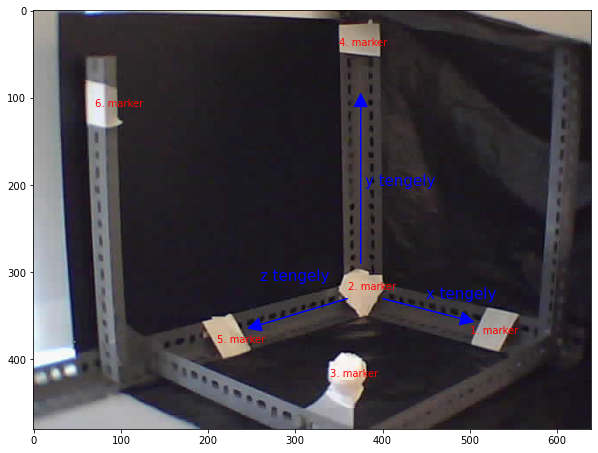

In [22]:
jobb = imread("jobbfinal.png")
figsize(10,10)
imshow(jobb)
plt.text(500,370,"1. marker", color = "red")
plt.text(360,320,"2. marker", color = "red")
plt.text(350,40,"4. marker", color = "red")
plt.text(340,420,"3. marker", color = "red")
plt.text(210,380,"5. marker", color = "red")
plt.text(70,110,"6. marker", color = "red")
plt.arrow(400,330, 90, 23, head_width=15, head_length=15, fc='blue', ec='blue', label='Arrow')
plt.text(450,330, "x tengely",color = "blue", size = 15)
plt.arrow(375,290,0,-180, head_width=15, head_length=15, fc='blue', ec='blue', label='Arrow')
plt.text(380,200,"y tengely", color = "blue", size = 15)
plt.arrow(360,330,-100,30, head_width=15, head_length=15, fc='blue', ec='blue', label='Arrow')
plt.text(260,310,"z tengely", color = "blue", size = 15)

**Második kamera**

| Marker | x [*cm*] | y [*cm*] | z [*cm*] | v [*px*] | w [*px*] |
|--|--|--|--|--|--|
|1.| 23|2 |2 |437 |360 |
|2.| 1|3 | 1| 288| 337|
|3.| 34|10 | 38| 411 | 409|
|4.|2 |39 |2 |278 | 79|
|5.| 2| 2| 27| 108 | 396  |
|6.|1 |32 |44| 57|136 |

Text(50, 130, '6. marker')

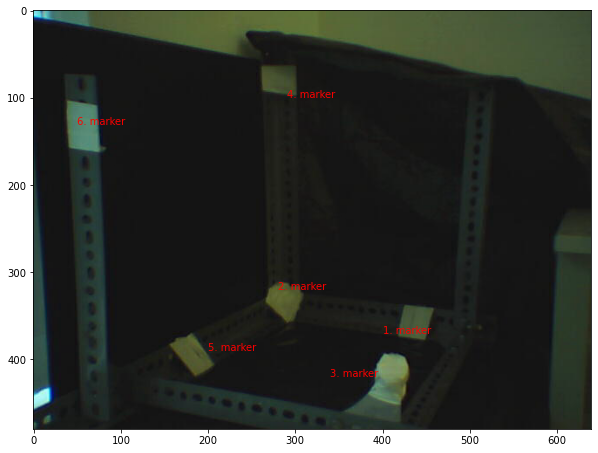

In [23]:
bal = imread("baloldali.png")
figsize(10,10)
imshow(bal)
plt.text(400,370,"1. marker", color = "red")
plt.text(280,320,"2. marker", color = "red")
plt.text(290,100,"4. marker", color = "red")
plt.text(340,420,"3. marker", color = "red")
plt.text(200,390,"5. marker", color = "red")
plt.text(50,130,"6. marker", color = "red")


## 3.3. Térbeli pozíció meghatározása (Szorgalmi, 8 pont)

<img src="supplementary/minta.png" alt="ismeretlen tárgy">
A két kalibrált kamera segítségével vegye fel egy kis kiterjedésű tárgy képét, például a képen látható jól detektálható markerét, és a kamerák rögzítette vetületekből becsűlje meg a tárgy térbeli helyét!